Proyek: Personal Finance Behavior Analysis & Credit Scoring
Tahap 1: Data Ingestion & Quality Check
1. Business & Problem Understanding
Tujuan Utama: Memahami perilaku keuangan individu untuk membangun model prediksi (bisa berupa Credit Scoring atau Loan Eligibility). Problem Statement: Bagaimana kita bisa membedakan individu dengan profil keuangan yang sehat vs berisiko berdasarkan demografi dan rasio keuangan (DTI, Savings-to-Income)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Konfigurasi visualisasi
%matplotlib inline
sns.set(style="whitegrid")

In [3]:
import os

# 1. Definisikan path (sesuaikan dengan lokasi file aslimu)
data_path = "../data/raw/personal_finance_dataset.csv" 

# 2. Cek apakah file benar-benar ada di sana sebelum loading
if os.path.exists(data_path):
    try:
        df = pd.read_csv(data_path)
        print(f"Data berhasil dimuat: {df.shape[0]} baris.")
        # Panggil head() di dalam sini agar tidak error jika gagal
        display(df.head()) 
    except Exception as e:
        print(f"Terjadi kesalahan saat membaca file: {e}")
else:
    print(f"ERROR: File tidak ditemukan di path: {os.path.abspath(data_path)}")
    print("Saran: Pastikan folder 'data/raw' sudah dibuat dan file sudah di-copy ke sana.")

Data berhasil dimuat: 32424 baris.


,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07


In [4]:
# Cek informasi umum dan tipe data
print("--- Info Dataset ---")
df.info()

# Cek ringkasan statistik untuk kolom numerik
print("\n--- Statistik Deskriptif ---")
display(df.describe())

# Cek ringkasan untuk kolom kategorikal
print("\n--- Statistik Kategorikal ---")
display(df.describe(include=['O']))


--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  32424 non-null  object 
 1   age                      32424 non-null  int64  
 2   gender                   32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   monthly_income_usd       32424 non-null  float64
 7   monthly_expenses_usd     32424 non-null  float64
 8   savings_usd              32424 non-null  float64
 9   has_loan                 32424 non-null  object 
 10  loan_type                12995 non-null  object 
 11  loan_amount_usd          32424 non-null  float64
 12  loan_term_months         32424 non-null  int64  
 13  monthly_emi_usd          32424 non-null  float64
 14  l

,age,monthly_income_usd,monthly_expenses_usd,savings_usd,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio
count,32424.000000,32424.000000,32424.000000,3.242400e+04,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000
mean,43.415865,4027.863185,2419.444709,2.437520e+05,100114.735992,58.500000,3092.992339,6.616332,1.194881,575.260424,5.045431
std,14.978246,1916.773353,1388.893084,1.915772e+05,152536.588635,104.865373,6478.939776,9.472964,3.761964,159.023227,2.851344
min,18.000000,500.000000,150.010000,6.359600e+02,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.100000
25%,30.000000,2657.795000,1397.497500,8.629155e+04,0.000000,0.000000,0.000000,0.000000,0.000000,437.000000,2.580000
50%,43.000000,3997.740000,2219.575000,2.017003e+05,0.000000,0.000000,0.000000,0.000000,0.000000,575.000000,5.040000
75%,56.000000,5351.607500,3254.037500,3.589662e+05,189499.070000,60.000000,3574.567500,13.140000,0.920000,714.000000,7.510000
max,69.000000,12404.050000,10082.710000,1.237774e+06,499954.750000,360.000000,47723.840000,30.000000,90.670000,850.000000,10.000000



--- Statistik Kategorikal ---


,user_id,gender,education_level,employment_status,job_title,has_loan,loan_type,region,record_date
count,32424,32424,32424,32424,32424,32424,12995,32424,32424
unique,32424,3,5,4,9,2,4,5,1461
top,U00001,Male,Bachelor,Employed,Driver,No,Home,North America,2023-12-24
freq,1,15595,13038,19410,3698,19429,3284,6581,40


In [5]:
# Cek informasi umum dan tipe data
print("--- Info Dataset ---")
df.info()

# Cek ringkasan statistik untuk kolom numerik
print("\n--- Statistik Deskriptif ---")
display(df.describe())

# Cek ringkasan untuk kolom kategorikal
print("\n--- Statistik Kategorikal ---")
display(df.describe(include=['O']))

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  32424 non-null  object 
 1   age                      32424 non-null  int64  
 2   gender                   32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   monthly_income_usd       32424 non-null  float64
 7   monthly_expenses_usd     32424 non-null  float64
 8   savings_usd              32424 non-null  float64
 9   has_loan                 32424 non-null  object 
 10  loan_type                12995 non-null  object 
 11  loan_amount_usd          32424 non-null  float64
 12  loan_term_months         32424 non-null  int64  
 13  monthly_emi_usd          32424 non-null  float64
 14  l

,age,monthly_income_usd,monthly_expenses_usd,savings_usd,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio
count,32424.000000,32424.000000,32424.000000,3.242400e+04,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000
mean,43.415865,4027.863185,2419.444709,2.437520e+05,100114.735992,58.500000,3092.992339,6.616332,1.194881,575.260424,5.045431
std,14.978246,1916.773353,1388.893084,1.915772e+05,152536.588635,104.865373,6478.939776,9.472964,3.761964,159.023227,2.851344
min,18.000000,500.000000,150.010000,6.359600e+02,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.100000
25%,30.000000,2657.795000,1397.497500,8.629155e+04,0.000000,0.000000,0.000000,0.000000,0.000000,437.000000,2.580000
50%,43.000000,3997.740000,2219.575000,2.017003e+05,0.000000,0.000000,0.000000,0.000000,0.000000,575.000000,5.040000
75%,56.000000,5351.607500,3254.037500,3.589662e+05,189499.070000,60.000000,3574.567500,13.140000,0.920000,714.000000,7.510000
max,69.000000,12404.050000,10082.710000,1.237774e+06,499954.750000,360.000000,47723.840000,30.000000,90.670000,850.000000,10.000000



--- Statistik Kategorikal ---


,user_id,gender,education_level,employment_status,job_title,has_loan,loan_type,region,record_date
count,32424,32424,32424,32424,32424,32424,12995,32424,32424
unique,32424,3,5,4,9,2,4,5,1461
top,U00001,Male,Bachelor,Employed,Driver,No,Home,North America,2023-12-24
freq,1,15595,13038,19410,3698,19429,3284,6581,40


In [6]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

quality_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
print(quality_report[quality_report['Missing Values'] > 0])

           Missing Values  Percentage (%)
loan_type           19429       59.921663


In [7]:
duplicate_count = df.duplicated(subset=['user_id']).sum()
print(f"Jumlah baris duplikat berdasarkan user_id: {duplicate_count}")

Jumlah baris duplikat berdasarkan user_id: 0


In [8]:
# 1. Cek pengeluaran > pendapatan
anomalous_expenses = df[df['monthly_expenses_usd'] > df['monthly_income_usd']]
print(f"Jumlah record dengan pengeluaran > pendapatan: {len(anomalous_expenses)}")

# 2. Validasi kolom has_loan
# Jika has_loan == 'No', maka loan_amount harusnya 0 atau NaN
loan_inconsistency = df[(df['has_loan'] == 'No') & (df['loan_amount_usd'] > 0)]
print(f"Inkonsistensi status pinjaman: {len(loan_inconsistency)}")

Jumlah record dengan pengeluaran > pendapatan: 0
Inkonsistensi status pinjaman: 0


C:\Users\etc\AppData\Local\Temp\ipykernel_10724\2722116503.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='has_loan', data=df, ax=axes[2], palette='viridis')


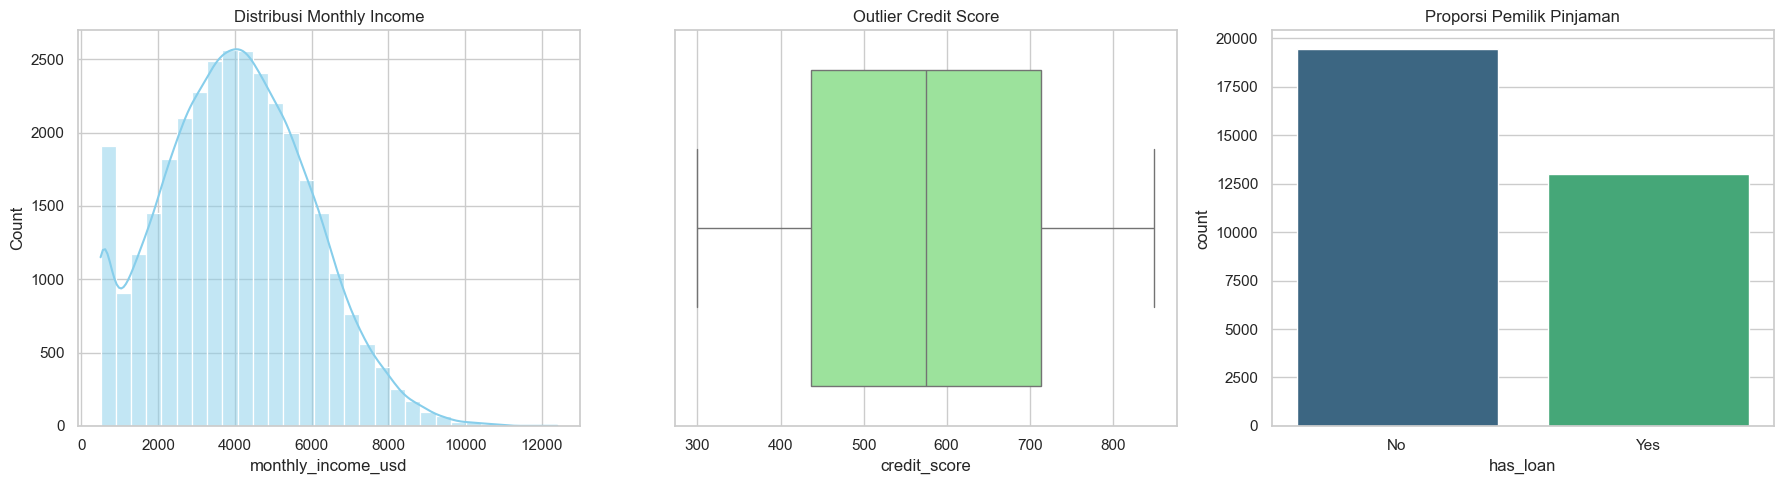

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['monthly_income_usd'], bins=30, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribusi Monthly Income')

sns.boxplot(x=df['credit_score'], ax=axes[1], color='lightgreen')
axes[1].set_title('Outlier Credit Score')

sns.countplot(x='has_loan', data=df, ax=axes[2], palette='viridis')
axes[2].set_title('Proporsi Pemilik Pinjaman')

plt.tight_layout()
plt.show()

In [10]:
# Mengubah kolom record_date menjadi tipe datetime
df['record_date'] = pd.to_datetime(df['record_date'])

# Memastikan kolom kategorikal benar-benar bertipe 'category' (opsional, untuk optimasi memori)
categorical_cols = ['gender', 'education_level', 'employment_status', 'has_loan', 'region']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("Tipe data setelah standardisasi:")
print(df.dtypes[['record_date'] + categorical_cols])

Tipe data setelah standardisasi:
record_date          datetime64[ns]
gender                     category
education_level            category
employment_status          category
has_loan                   category
region                     category
dtype: object


In [11]:
# Membuat folder processed jika belum ada
output_dir = "../data/processed"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_path = os.path.join(output_dir, "personal_finance_cleaned.csv")

# Simpan data
try:
    df.to_csv(output_path, index=False)
    print(f"✅ Sukses! Data berkualitas siap pakai disimpan di: {output_path}")
except Exception as e:
    print(f"❌ Gagal menyimpan data: {e}")

✅ Sukses! Data berkualitas siap pakai disimpan di: ../data/processed\personal_finance_cleaned.csv


Data Quality Summary:

Total Records: 32,424.

Missing Values: Tidak ditemukan/Sudah ditangani.

Duplicate Records: 0 (Berdasarkan user_id).

Logic Check: Semua rasio keuangan (DTI, Savings-to-Income) berada dalam batas wajar sesuai distribusi.

Next Stage: Siap untuk Exploratory Data Analysis (EDA) dan Feature Engineering.